In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from Listas import North_America, Cen_Sth_America, Europe, Eurasia, Africa, Middle_East, Asia_Oceania, lst_SRC_P
from Variables import dicc_country, ltW, cdW

# Primary Energy ((Production Btu))

df_1 = pd.read_csv('Total_Energy_Production.csv', sep=',', header = 1, engine='python', index_col=False)
df_1 = df_1.rename(columns= {'API' : 'Code',
'Unnamed: 1' : 'Source' })

'''Limpiamos nuestras columnas y nos quedamos únicamente con los países de nuestro DataSet y sus acrónimos'''

# Una vez sacamos una lista de totdos los países eliminamos la filas con NAn
df_1 = df_1.dropna(axis=0, thresh=39)

#Lista de Países
# lista_'Code'

lista_1 = []
lista_2 = []

for n in df_1['Code']:
    string = n.split('-')
    lista_1.append(string)
# print(lista_1)
for m in lista_1:
    elemento = m[2]
    lista_2.append(elemento)
# print(lista_2)
#Modificamos la columna 'Code'
df_1['Code'] = lista_2


In [2]:
df_1['Source'].unique()

array(['    Production (quad Btu)', '        Coal (quad Btu)',
       '        Natural gas (quad Btu)',
       '        Petroleum and other liquids (quad Btu)',
       '        Nuclear, renewables, and other (quad Btu)',
       '            Nuclear (quad Btu)',
       '            Renewables and other (quad Btu)'], dtype=object)

In [3]:

'''Modificamos la columna 'Source'; Recordar que las unidades son (quad Btu)'''

# lst_SRC_new = ['Production', 'Coal', 'Natural gas', 'Petroleum and other liquids', 'Nuclear, renewables, and other', 'Nuclear', 'Renewables']
arr = df_1['Source'].unique()
lst_SRC_old = arr.tolist()
src = zip(lst_SRC_P, lst_SRC_old)
source = list(src)

for list in source:
    df_1.replace(list[1], 
           list[0], 
           inplace=True)


In [4]:

df_1['Source'].unique()


array(['Production', 'Coal', 'Natural gas', 'Petroleum and other liquids',
       'Nuclear, renewables, and other', 'Nuclear', 'Renewables'],
      dtype=object)

In [5]:
df_1['Source'].unique = ['Consumption', 'Coal', 'Natural gas', 'Petroleum and other liquids',
       'Nuclear, renewables, and other', 'Nuclear', 'Renewables']

In [6]:
df_1['Source'].unique

['Consumption',
 'Coal',
 'Natural gas',
 'Petroleum and other liquids',
 'Nuclear, renewables, and other',
 'Nuclear',
 'Renewables']

In [7]:

#to numeric
# dfs.loc[:,'1980':'2019'] = dfs.loc[:,'1980':'2019'].apply(pd.to_numeric())
for col in df_1.loc[:,'1980':'2019']:
    df_1[col] = pd.to_numeric(df_1[col], errors ='coerce')

'''df_1 es la versión extendidad de dfP'''

df_1.replace(0.0, np.nan, inplace=True)
df_1 = df_1.dropna(thresh=4).reset_index(drop=True)
df_1 = df_1.fillna(0)

'''Creamos dfP que es el DataSet con el que vamos a trabajar (desde 1997 hasta 2019)'''

dfP = df_1.drop(df_1.loc[:, '1980':'1996'], axis=1)
dfP.replace(0.0, np.nan, inplace=True)
dfP = dfP.dropna(thresh=4).reset_index(drop=True)
dfP = dfP.fillna(0)

In [8]:
#dfP.head(10)
#dfP.tail(10)
# dfP['Code'].nunique()
dfP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Code    928 non-null    object 
 1   Source  928 non-null    object 
 2   1997    928 non-null    float64
 3   1998    928 non-null    float64
 4   1999    928 non-null    float64
 5   2000    928 non-null    float64
 6   2001    928 non-null    float64
 7   2002    928 non-null    float64
 8   2003    928 non-null    float64
 9   2004    928 non-null    float64
 10  2005    928 non-null    float64
 11  2006    928 non-null    float64
 12  2007    928 non-null    float64
 13  2008    928 non-null    float64
 14  2009    928 non-null    float64
 15  2010    928 non-null    float64
 16  2011    928 non-null    float64
 17  2012    928 non-null    float64
 18  2013    928 non-null    float64
 19  2014    928 non-null    float64
 20  2015    928 non-null    float64
 21  2016    928 non-null    float64
 22  20

In [9]:
dfP.describe()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,...,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,1.765945,1.785934,1.788410,1.847645,1.872995,1.881976,1.949841,2.052301,2.124642,2.181899,...,2.394617,2.463017,2.515879,2.557863,2.603605,2.628371,2.618632,2.684550,2.790452,2.843173
std,14.703308,14.873048,14.848231,15.347189,15.557668,15.619812,16.239649,17.106358,17.716634,18.193538,...,19.991166,20.642034,21.143391,21.450704,21.811113,21.996172,21.779748,22.315705,23.209838,23.663495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000489,0.000500,0.000511,0.000675,0.000680,0.000733,0.000877,0.000899,0.000990,0.001289,...,0.001641,0.001631,0.002151,0.002146,0.002146,0.002588,0.002846,0.003089,0.003385,0.003339
50%,0.021468,0.021842,0.027027,0.027426,0.029046,0.027991,0.028674,0.032076,0.037096,0.039536,...,0.048436,0.045414,0.045613,0.049975,0.049278,0.052223,0.051247,0.051517,0.055239,0.056204
75%,0.288784,0.288347,0.285386,0.329033,0.338980,0.362493,0.357421,0.389594,0.406426,0.413771,...,0.436682,0.458346,0.433225,0.430163,0.440489,0.423152,0.429061,0.422562,0.444642,0.454485
max,382.303301,386.793094,386.638361,399.855216,405.547260,407.358359,423.130535,445.445906,461.321135,473.697064,...,518.731658,534.187873,546.333605,554.177553,563.331242,568.558292,564.580276,578.245254,600.728730,611.508969


## (Basura)

In [10]:
# lista_0 = []

# for m in df_1['Source']:
#     lista_0.append(m)
#     lista_Paises = lista_0[0::8]

# df = np.array(lista_2) # Lo convertimos a array 
# df = pd.DataFrame(df) # Lo convertimos en Datafrae
# df.rename(columns= {0:'col'}, inplace=True)
# df['col'].unique()
# # Hacemos un diccionario donde tengamos todos los píses y sus acrónimos.
# dicc_country = dict(zip(lista_Paises, df['col'].unique()))
# dicc_country_1 = dict(zip(df['col'].unique(),lista_Paises))


# exp[exp['1980'] == exp['1980'].max()]
#exp[exp['2019'] >= 9.0]

# lst_North_America = []
# for pais in North_America:
#     lst_North_America.append(dicc_country[pais])

# print(lst_North_America)

# for pais in lst_North_America:
#     dfs = df_1[df_1['Country'] == pais]
# dfs = df_1[(df_1['Country'] == 'CAN') | (df_1['Country'] == 'MEX') | (df_1['Country'] == 'USA')]
# dfs[dfs['Source'] == 'Natural gas']
# dfs[dfs['Source'] == 'Production']
# dfs.loc[:,'1980':'2019']

In [11]:
len(df_1['Code'].unique())

215

In [12]:
total_204 = ['WORL', 'AFG', 'ALB', 'DZA', 'ASM', 'AGO', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB',
       'BRN', 'BGR', 'BFA', 'MMR', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN',
       'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COD',
       'CRI', 'HRV', 'CUB', 'CYP', 'CZE', 'CIV', 'DNK', 'DJI', 'DMA',
       'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH',
       'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC',
       'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI',
       'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL',
       'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'XKS',
       'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LTU',
       'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MTQ',
       'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MNE', 'MAR', 'MOZ', 'NAM',
       'NPL', 'NLD', 'NLDA', 'NZL', 'NIC', 'NER', 'NGA', 'PRK', 'MKD',
       'MNP', 'NOR', 'OMN', 'PAK', 'PSE', 'PAN', 'PNG', 'PRY', 'PER',
       'PHL', 'POL', 'PRT', 'PRI', 'QAT', 'REU', 'ROU', 'RUS', 'RWA',
       'KNA', 'LCA', 'VCT', 'WSM', 'STP', 'SAU', 'SEN', 'SRB', 'SYC',
       'SLE', 'SGP', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'KOR', 'SSD',
       'ESP', 'LKA', 'SDN', 'SUR', 'SWE', 'CHE', 'SYR', 'TWN', 'TJK',
       'TZA', 'THA', 'BHS', 'TLS', 'TGO', 'TON', 'TTO', 'TUN', 'TUR',
       'TKM', 'VIR', 'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 'UZB',
       'VUT', 'VEN', 'VNM', 'YEM', 'ZMB', 'ZWE']

In [13]:
# x1 = dfs.groupby('Source')['1980'].sum()
# x2 = np.random.normal(-2, 1, 1000)
# x3 = np.random.normal(3, 2, 1000)

# kwargs = dict(alpha = 0.7, bins = 40)

# plt.hist(x1, **kwargs);
# plt.hist(x2, **kwargs)
# plt.hist(x3, **kwargs);

# plt.bar(img1['Source'], img1['1980'])
# plt.xticks(img1['Source'], rotation='vertical', size=8)
# plt.ylabel('Quad (mtu)')
# plt.xlabel('Source')
# plt.show()

## Apartir de aquí dibujamos!!!

In [14]:
tb1 = df_1[df_1['Code'] == 'WORL'].groupby('Source').sum()
tb1.reset_index(inplace=True)
tb1

,Source,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Coal,80.114194,80.460729,83.398929,83.686353,87.669423,91.679763,94.044603,96.273156,98.484482,...,156.210012,164.666096,169.225246,171.897851,171.426576,167.602751,157.777584,162.088377,168.307734,171.840424
1,Natural gas,54.761046,55.573537,55.495523,56.115952,61.758598,64.124523,65.328648,68.456090,71.852938,...,116.945679,121.002643,123.533191,125.031915,126.990053,129.644515,130.876105,136.850601,144.439144,149.401588
2,Nuclear,7.575700,8.527153,9.507686,10.718344,12.994608,15.298615,16.247905,17.643888,19.226897,...,27.379918,26.247553,24.474109,24.651921,25.138315,25.437528,25.712197,25.898281,26.513244,27.659891
3,"Nuclear, renewables, and other",28.350879,29.814558,31.463309,33.975146,36.939166,39.525187,40.830969,42.239018,44.590140,...,74.167091,75.071722,75.355384,79.276699,82.255990,83.475416,87.128047,90.569217,94.930957,98.132398
4,Petroleum and other liquids,133.111109,125.438949,119.762805,119.269196,122.553827,121.134790,126.548845,127.416242,132.485303,...,171.408876,173.447412,178.219785,177.971089,182.658624,187.835610,188.798540,188.737060,193.050893,192.134558
5,Production,296.337228,291.287773,290.120567,293.046647,308.921014,316.464262,326.753065,334.384506,347.412863,...,518.731658,534.187873,546.333605,554.177553,563.331242,568.558292,564.580276,578.245254,600.728730,611.508969
6,Renewables,20.775178,21.287405,21.955623,23.256802,23.944559,24.226571,24.583064,24.595130,25.363243,...,46.787173,48.824169,50.881275,54.624777,57.117674,58.037888,61.415850,64.670935,68.417714,70.472507


In [15]:
img1 = tb1.drop([3, 5], axis=0)


In [16]:
img1

,Source,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Coal,80.114194,80.460729,83.398929,83.686353,87.669423,91.679763,94.044603,96.273156,98.484482,...,156.210012,164.666096,169.225246,171.897851,171.426576,167.602751,157.777584,162.088377,168.307734,171.840424
1,Natural gas,54.761046,55.573537,55.495523,56.115952,61.758598,64.124523,65.328648,68.456090,71.852938,...,116.945679,121.002643,123.533191,125.031915,126.990053,129.644515,130.876105,136.850601,144.439144,149.401588
2,Nuclear,7.575700,8.527153,9.507686,10.718344,12.994608,15.298615,16.247905,17.643888,19.226897,...,27.379918,26.247553,24.474109,24.651921,25.138315,25.437528,25.712197,25.898281,26.513244,27.659891
4,Petroleum and other liquids,133.111109,125.438949,119.762805,119.269196,122.553827,121.134790,126.548845,127.416242,132.485303,...,171.408876,173.447412,178.219785,177.971089,182.658624,187.835610,188.798540,188.737060,193.050893,192.134558
6,Renewables,20.775178,21.287405,21.955623,23.256802,23.944559,24.226571,24.583064,24.595130,25.363243,...,46.787173,48.824169,50.881275,54.624777,57.117674,58.037888,61.415850,64.670935,68.417714,70.472507


In [17]:
img1.reset_index(drop=True, inplace=True)

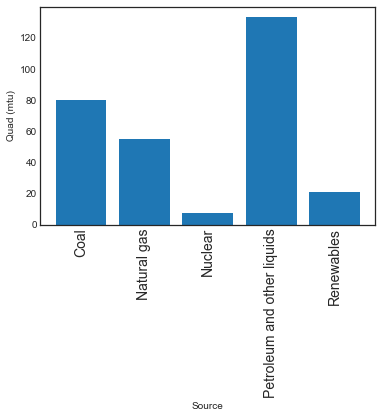

In [18]:
plt.bar(img1['Source'], img1['1980'])
plt.xticks(img1['Source'], rotation='vertical', size=14)
plt.ylabel('Quad (mtu)')
plt.xlabel('Source')
plt.show()

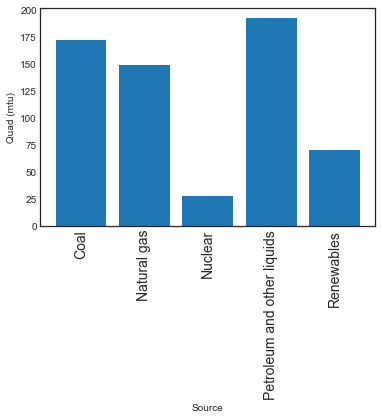

In [19]:
plt.bar(img1['Source'], img1['2019'])
plt.xticks(img1['Source'], rotation='vertical', size=14)
plt.ylabel('Quad (mtu)')
plt.xlabel('Source')
plt.show()

In [20]:
df_1[(df_1['Code'] == 'WORL') & (df_1['Source'] == 'Production')][['Code', 'Source','1980', '2019']]

,Code,Source,1980,2019
0,WORL,Production,296.337228,611.508969


In [21]:
dicc_country['Poland']

'POL'

In [22]:
tb2 = df_1[df_1['Code'] == 'ESP']
tb2.reset_index(inplace=True, drop=True)
tb2
img2 = tb2.drop([0, 4], axis=0)
img2.reset_index(inplace=True, drop=True)
img2

,Code,Source,1980,1981,1982,1983,1984,1985,1986,1987,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ESP,Coal,0.502340,0.622296,0.702657,0.709387,0.702977,0.704238,0.680392,0.614182,...,0.149679,0.117559,0.109747,0.078142,0.068187,0.054472,0.035558,0.048440,0.038182,0.000000
1,ESP,Natural gas,0.000000,0.000000,0.000000,0.002774,0.008847,0.010111,0.014937,0.028575,...,0.001966,0.002005,0.002283,0.002236,0.000917,0.002387,0.002079,0.001386,0.003686,0.005121
2,ESP,Petroleum and other liquids,0.069810,0.052740,0.063290,0.122360,0.097310,0.092830,0.091279,0.081250,...,0.005427,0.004572,0.006352,0.015478,0.013183,0.009814,0.005641,0.005069,0.003797,0.001720
3,ESP,Nuclear,0.058638,0.106635,0.097762,0.117111,0.251106,0.302163,0.403632,0.444652,...,0.595177,0.553652,0.589610,0.540481,0.545922,0.544917,0.558282,0.553565,0.530349,0.555835
4,ESP,Renewables,0.306488,0.230416,0.276540,0.286439,0.330019,0.328819,0.278031,0.287054,...,0.998158,0.889224,0.854982,1.098451,1.102509,0.954812,1.022240,0.881376,1.023065,0.987921


APARTE

In [23]:
anios = np.array(img2.columns)[2:]
np.shape(anios)

(40,)

In [24]:
# anios = np.reshape(np.array(img2.columns)[2:], (1,40))

In [25]:
# np.shape(anios)

In [26]:
anios

array(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype=object)

In [27]:
# np.array(img2['2019'])

In [28]:
coal = np.reshape(np.array(img2[img2['Source'] == 'Coal'])[:,2:], (40,))
nt_gas = np.reshape(np.array(img2[img2['Source'] == 'Natural gas'])[:,2:], (40,))
petrol = np.reshape(np.array(img2[img2['Source'] == 'Petroleum and other liquids'])[:,2:], (40,))
nuclear = np.reshape(np.array(img2[img2['Source'] == 'Nuclear'])[:,2:], (40,))
renewables = np.reshape(np.array(img2[img2['Source'] == 'Renewables'])[:,2:], (40,))
# np.reshape(coal, (40,))
# np.reshape(nt_gas, (40,))

In [29]:
# fig, ax = plt.subplots()
# anios = np.reshape(np.array(img2.columns)[2:], (1,40))
# ax.plot(anios, coal, color='blue')
# ax.plot(anios, nt_gas, color='g')
# ax.plot(anios, petrol, color='0.75')
# ax.plot(anios, img2[img2['Nuclear'] == 'Coal'], marker = 'o')
# ax.plot(anios, img2[img2['Renewables and other'] == 'Coal'], marker = 'o')
# plt.show()

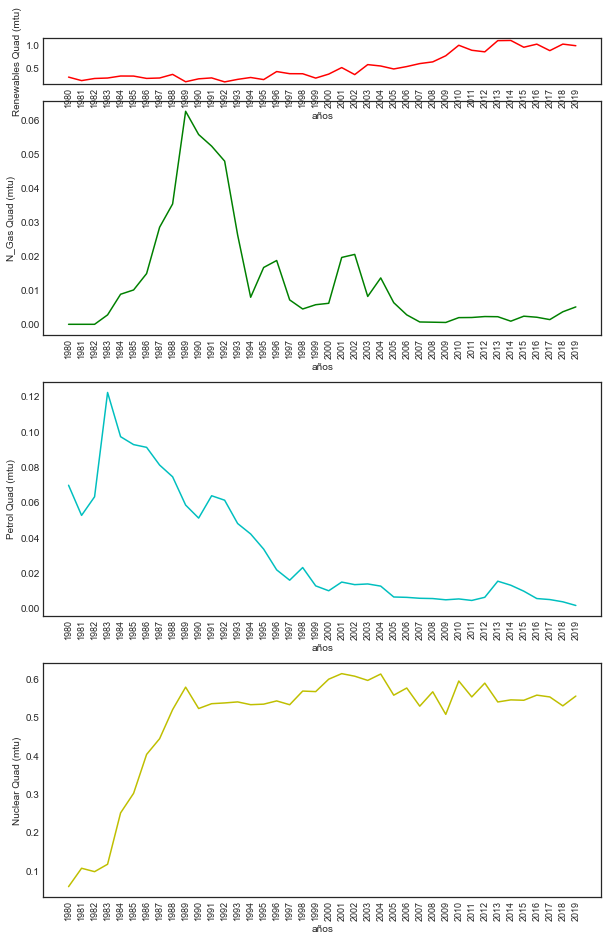

In [30]:
plt.figure(figsize=[10,25])
# anios = np.array(img2.columns)[2:], (1,40)
plt.subplot(5, 1, 1) #roxs, columns, position
plt.plot(anios, coal, color='blue')
plt.xticks(anios, rotation='vertical', size=9)
plt.xlabel('años')
plt.ylabel('Coal Quad (mtu)')

plt.subplot(5, 1, 2)
plt.plot(anios, nt_gas, color='g')
plt.xticks(anios, rotation='vertical', size=9)
plt.xlabel('años')
plt.ylabel('N_Gas Quad (mtu)')

plt.subplot(5, 1, 3)
plt.plot(anios, petrol, color='c')
plt.xticks(anios, rotation='vertical', size=9)
plt.xlabel('años')
plt.ylabel('Petrol Quad (mtu)')

plt.subplot(5, 1, 4)
plt.plot(anios, nuclear, color='y')
plt.xticks(anios, rotation='vertical', size=9)
plt.xlabel('años')
plt.ylabel('Nuclear Quad (mtu)')

plt.subplot(25, 1, 5)
plt.plot(anios, renewables, color='r')
plt.xticks(anios, rotation='vertical', size=9)
plt.xlabel('años')
plt.ylabel('Renewables Quad (mtu)');

In [31]:
img2.T

,0,1,2,3,4
Code,ESP,ESP,ESP,ESP,ESP
Source,Coal,Natural gas,Petroleum and other liquids,Nuclear,Renewables
1980,0.50234,0,0.06981,0.0586381,0.306488
1981,0.622296,0,0.05274,0.106635,0.230416
1982,0.702657,0,0.06329,0.0977616,0.27654
1983,0.709387,0.0027744,0.12236,0.117111,0.286439
1984,0.702977,0.0088473,0.09731,0.251106,0.330019
1985,0.704238,0.0101112,0.09283,0.302163,0.328819
1986,0.680392,0.014937,0.0912791,0.403632,0.278031
1987,0.614182,0.028575,0.0812499,0.444652,0.287054


In [32]:
# plt.figure(figsize=(12,8))
# sns.kdeplot(data=iris_df[iris_df.columns.values[0:4]], shade=True);

In [33]:
df_1[df_1['Source'] == 'Production']

,Code,Source,1980,1981,1982,1983,1984,1985,1986,1987,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,WORL,Production,296.337228,291.287773,290.120567,293.046647,308.921014,316.464262,326.753065,334.384506,...,518.731658,534.187873,546.333605,554.177553,563.331242,568.558292,564.580276,578.245254,600.728730,611.508969
7,AFG,Production,0.072561,0.092724,0.095068,0.099713,0.099827,0.120968,0.120550,0.114835,...,0.026926,0.041044,0.037492,0.040817,0.044790,0.042058,0.049505,0.059501,0.063176,0.055210
12,ALB,Production,0.155562,0.158691,0.205944,0.234693,0.191025,0.191730,0.196596,0.202388,...,0.098491,0.075857,0.084038,0.105636,0.092962,0.102255,0.125356,0.082296,0.115529,0.089082
18,DZA,Production,2.803017,3.037537,3.224934,3.606400,3.859176,3.907466,3.968325,4.218086,...,6.927838,6.828492,6.999410,6.510419,6.561760,6.696193,6.910710,6.763857,6.688552,6.429790
24,AGO,Production,0.335098,0.291294,0.276262,0.395408,0.462550,0.511269,0.621433,0.789429,...,4.138003,3.816194,3.890827,3.932204,3.802528,3.949947,3.935297,3.800319,3.792675,3.510208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,VEN,Production,5.766784,5.667510,5.250659,5.032015,5.056074,4.817756,5.214786,5.171222,...,7.256777,7.545072,7.583972,7.539512,7.347768,7.411477,6.821431,6.174772,4.961464,3.551700
956,VNM,Production,0.149186,0.171762,0.181604,0.182734,0.148979,0.164425,0.180852,0.196336,...,2.418552,2.582051,2.654621,2.595761,2.662842,2.739876,2.675782,2.750207,2.752523,2.556372
962,YEM,Production,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020849,0.041933,...,0.823787,0.811723,0.632781,0.667096,0.617006,0.203760,0.057607,0.075429,0.101645,0.133273
967,ZMB,Production,0.107537,0.113571,0.118437,0.115554,0.114707,0.115406,0.114774,0.098350,...,0.101434,0.111087,0.119190,0.129724,0.136778,0.124983,0.109538,0.134275,0.153048,0.148004


In [38]:
# tb3 = df_1[df_1['Country'] == 'POL']
# tb3.reset_index(inplace=True, drop=True)
# tb3
# img3 = tb3.drop([0, 4], axis=0)
# img3.reset_index(inplace=True, drop=True)
# img3.T

In [ ]:
# ltW = []
# for x in dicc_country.keys():
#     ltW.append(x)

 ¿Son los países con mayores reservas de petróleo, los más ricos (PPP) y los que menos renovables tienen?

In [35]:
df_1.head(7)

,Code,Source,1980,1981,1982,1983,1984,1985,1986,1987,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,WORL,Production,296.337228,291.287773,290.120567,293.046647,308.921014,316.464262,326.753065,334.384506,...,518.731658,534.187873,546.333605,554.177553,563.331242,568.558292,564.580276,578.245254,600.728730,611.508969
1,WORL,Coal,80.114194,80.460729,83.398929,83.686353,87.669423,91.679763,94.044603,96.273156,...,156.210012,164.666096,169.225246,171.897851,171.426576,167.602751,157.777584,162.088377,168.307734,171.840424
2,WORL,Natural gas,54.761046,55.573537,55.495523,56.115952,61.758598,64.124523,65.328648,68.456090,...,116.945679,121.002643,123.533191,125.031915,126.990053,129.644515,130.876105,136.850601,144.439144,149.401588
3,WORL,Petroleum and other liquids,133.111109,125.438949,119.762805,119.269196,122.553827,121.134790,126.548845,127.416242,...,171.408876,173.447412,178.219785,177.971089,182.658624,187.835610,188.798540,188.737060,193.050893,192.134558
4,WORL,"Nuclear, renewables, and other",28.350879,29.814558,31.463309,33.975146,36.939166,39.525187,40.830969,42.239018,...,74.167091,75.071722,75.355384,79.276699,82.255990,83.475416,87.128047,90.569217,94.930957,98.132398
5,WORL,Nuclear,7.575700,8.527153,9.507686,10.718344,12.994608,15.298615,16.247905,17.643888,...,27.379918,26.247553,24.474109,24.651921,25.138315,25.437528,25.712197,25.898281,26.513244,27.659891
6,WORL,Renewables,20.775178,21.287405,21.955623,23.256802,23.944559,24.226571,24.583064,24.595130,...,46.787173,48.824169,50.881275,54.624777,57.117674,58.037888,61.415850,64.670935,68.417714,70.472507


In [36]:
df_1[df_1['Source'] == 'Renewables and other'].describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# df_1[df_1['Country'] == 'ESP']

In [40]:
n1 = df_1[(df_1['Country'] == 'CHN') & (df_1['Source'] == 'Production')]['1991']

KeyError: 'Country'

In [ ]:
float(n1)

In [ ]:
renw_c = [] 
count = 0

n1 = df_1[(df_1['Country'] == 'ESP') & (df_1['Source'] == 'Production')]['1990']
# print(n1)
n2 = 0.5 * float(n1)
# print(n2)
n3 = df_1[(df_1['Country'] == 'ESP') & (df_1['Source'] == 'Renewables and other')]['1990']
# print(n3)
n4 = float(n3)
# print(n4)

if float(n4) > float(n2):
    renw_c.append('ESP')
else:
    count += 1

In [ ]:
print(str(renw_c) + ' y ' + str(count))

In [ ]:
# df_1[(df_1['Source'] == 'Renewables and other') > (0.5 * df_1['Source'] == 'Production')]
list = [str(x) for x in range(1980, 2020, 1)]
list_aux = []
renw_c = set() 
count = 0

for pais in cdW:
    for i in list:
        n1 = df_1[(df_1['Country'] == pais) & (df_1['Source'] == 'Production')][i]
        # print(n1)
        n2 = 0.5 * n1
        # print(n2)
        n3 = df_1[(df_1['Country'] == pais) & (df_1['Source'] == 'Renewables and other')][i]
        # print(n3)
        n4 = n3
        # print(n4)
        if float(n4) > float(n2):
            renw_c.add(pais)
        else:
            count += 1

In [ ]:
len(renw_c)

In [ ]:
len(cdW)

In [ ]:
print(renw_c)

In [ ]:
df_1[df_1['Country'] == 'IRL']

 ¿Cuales son los paises más nucleares?

In [ ]:
df_1[df_1['Source'] == 'Nuclear'].describe()

In [ ]:
df_1[(df_1['Source'] == 'Nuclear') & (df_1['2019'] > 2)]

In [ ]:
df_1[(df_1['Source'] == 'Nuclear') & (df_1['2019'] > 0.55)].sort_values('2019', ascending=False).reset_index(drop=True)

In [ ]:
df_1[df_1['Country'] == 'UKN']
df_1[df_1['Country'] == 'SWE']
df_1[df_1['Country'] == 'KOR']
df_1[df_1['Country'] == 'JPN']

In [ ]:
n1 = df_1[(df_1['Country'] == pais) & (df_1['Source'] == 'Production')][i]
n1

In [ ]:
# df_1[(df_1['Source'] == 'Nuclear') > (0.5 * df_1['Source'] == 'Production')]
nuclear_c = set() 
count = 0

for pais in cdW:
    for i in list:
        n1 = df_1[(df_1['Country'] == pais) & (df_1['Source'] == 'Production')][i].astype(float) * 0.5
        # print(n1)
        n3 = df_1[(df_1['Country'] == pais) & (df_1['Source'] == 'Nuclear')][i].astype(float)
        # print(n3)
        if float(n3) > float(n1):
            nuclear_c.add(pais)
        else:
            count += 1

In [ ]:
dicc_country['Botswana']

In [ ]:
df_1[df_1['Country'] == 'BWA'][['Country', 'Source', '2014', '2015', '2016', '2017', '2018', '2019']]

In [ ]:
lst_Afr = ['TUN', 'DZA', 'MAR', 'GAB', 'ZAF']

In [ ]:
df_1[df_1['Source'] == 'Nuclear']

In [ ]:
df_Afr = df_1[df_1['Country'].isin(lst_Afr)][['Country', 'Source', '2014', '2015', '2016', '2017', '2018', '2019']]
df_Afr
# df_Afr.sort_values('2014', ascending=False).reset_index(drop=True)

In [ ]:
dicc_country['South Africa']

In [ ]:
# x = df_Afr[df_Afr['Source'] == 'Coal'][['2019']].aggregate(sum)
# y = df_Afr[df_Afr['Source'] == 'Natural gas'][['2019']].aggregate(sum)
# z = df_Afr[df_Afr['Source'] == 'Petroleum and other liquids'][['2019']].aggregate(sum)
# t = df_Afr[df_Afr['Source'] == 'Nuclear, renewables, and other'][['2019']].aggregate(sum)
# m = df_Afr[df_Afr['Source'] == 'Renewables and other'][['2019']].aggregate(sum)

In [ ]:
queso = df_Afr.groupby(df_Afr['Source']).aggregate(sum)
queso.drop('Production', inplace=True)
queso.drop('Nuclear, renewables, and other', inplace=True)

Intentar poner en quesitos el cuadro de arriba!

In [ ]:
queso.plot.pie(y='2019', figsize=(5, 5))

In [ ]:
# plot = queso.plot.pie(subplots=True, figsize=(11, 10))

In [ ]:
import matplotlib.pyplot as plt

# create data: an array of values
size_of_groups=[x,y,z,t,m]

# Create a pieplot
plt.pie(size_of_groups)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

manzanas = [x,y,z,t,m]
nombres = df_Afr['Source'].unique()

normdata = colors.Normalize(min(manzanas), max(manzanas))
colormap = cm.get_cmap("Blues")
colores =colormap(normdata(manzanas))

plt.pie(manzanas, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()